In [3]:
'''
(C) Copyright Jasper Kranias,2023.
This code is licensed under the Apache License,Version 2.0.You may
obtain a copy of this license in the LICENSE.txt file in the root \
directory
of this source tree or at \
http://www.apache.org/licenses/LICENSE-2.0.#
Any modifications or derivative works of this code must retain this
copyright notice,and modified files need to carry a notice indicating
that they have been altered from the originals.
'''


import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
plt.rcParams["text.usetex"]=False
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#set plot settings here
#labelsize
lsize=14
#fontsize
fsize=21
#linewidth
wsize=2.5
plt.rc('xtick', labelsize=lsize) 
plt.rc('ytick', labelsize=lsize)

In [169]:
#critical T to surpass MZI
def TC(N):
    if N==0.5:
        return 1/np.sqrt(2)
    
    else:
        return np.max([((2*N-1)/(8*N))*(1-np.sqrt(1+16*N/((2*N-1)**2))),((2*N-1)/(8*N))*(1+np.sqrt(1+16*N/((2*N-1)**2)))])


#range of T values
Tvals=np.linspace(0.1,0.999,1000)


#optimal seeding |a|^2 if b=0, given ropt
def optseed(r):
    return (N-np.sinh(r)**2)/(np.cosh(r)**2)

#finds M for QFI calculation
def M(s):
    l=int(len(s)/2)
    omg=np.block([[np.zeros((l,l)),np.identity(l)],[-np.identity(l),np.zeros((l,l))]])
    return np.kron(s,s)-np.kron(omg,omg)

#returns first term of QFI given s and ds
def Mtermbad(s,ds):
    return (1/2)*np.dot(ds,np.linalg.solve(M(s),ds))

def Minv(s,sinv):
    l=int(len(s)/2)
    omg=np.block([[np.zeros((l,l)),np.identity(l)],[-np.identity(l),np.zeros((l,l))]])
    evals,evecs=np.linalg.eig(np.dot(s,omg))
    q=evecs
    L=np.diag(evals)
    Linv=np.linalg.inv(np.identity(4*l**2)-np.kron(L,L)) 
    qinv=np.linalg.inv(q)
    Ainv=np.kron(sinv,sinv)
    Q=np.kron(q,q)
    Qinv=np.kron(qinv,qinv)
    return Ainv-np.linalg.multi_dot([Ainv,Q,Linv,Qinv])

#QFI of MZI
def MZI(T):  
    return 4*T*N
    

In [170]:
N=0.1
rmax=np.arcsinh(np.sqrt(N))
rlist=np.linspace(0,rmax,1000)

#Internal data

#QFI for internal loss
def IY(T,r):
    return (((T*np.sinh(2*r))**2)/(1-T+T**2+T*(1-T)*np.cosh(2*r))+4*T*(1-T+T*np.cosh(2*r))*(N-np.sinh(r)**2)/(1-2*T+2*(T**2)+2*T*(1-T)*np.cosh(2*r)))


#data will be of the form [T,IQmax,r1opt]
data=[]

for i in Tvals:
    Ilist=[]
    for j in rlist:
        Ilist.append(IY(i,j))
        
    graph=[rlist,Ilist]
    IQmax=np.amax(graph,axis=1)[1]
    optcoord=np.argmax(graph,axis=1)[1]
    r1opt=rlist[optcoord]
    data.append([i,IQmax,r1opt])
    
TdataY=np.transpose(data)[0]
IdataY=np.transpose(data)[1]
rdataY=np.transpose(data)[2]

Ndata=np.linspace(0.01,10,1000)
TCdataA=[]
for n in Ndata:
    TCdataA.append(TC(n))

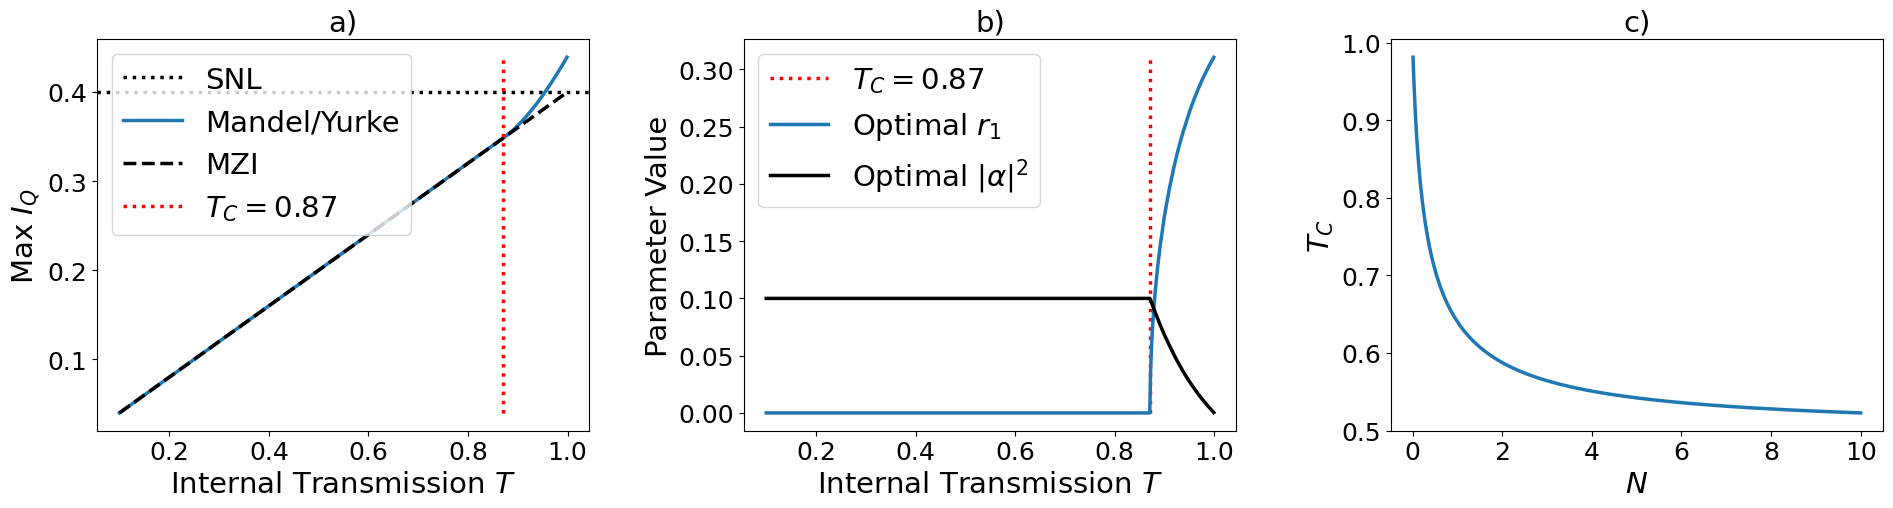

In [173]:
#internal loss plots


fig, ax= plt.subplots(nrows=1, ncols=3, figsize=(20, 6))



#ax[0].set_title(r"Max $I_Q$ vs. T of Yurke/Mandel Interferometer"+"\n"+"for $N=$"+str(N)+", $\eta=1$",fontsize=fsize)
ax[0].set_title("a)",fontsize=fsize)
ax[0].set_xlabel(r"Internal Transmission $T$",fontsize=fsize)
ax[0].set_ylabel(r"Max $I_Q$",fontsize=fsize)
ax[0].axhline(4*N,xmin=0,xmax=1,color="black",linestyle="dotted",label=r"SNL",linewidth=wsize)
ax[0].plot(TdataY,IdataY,label="Mandel/Yurke",linewidth=wsize)
ax[0].plot(TdataY,MZI(TdataY),color="black",linestyle="dashed",label="MZI",linewidth=wsize)
ax[0].vlines(x=TC(N),ymin=np.min(IdataY),ymax=np.max(IdataY),color="red",label="$T_C=$"+str(round(TC(N),2)),linestyle="dotted",linewidth=wsize)
ax[0].legend(fontsize=fsize)
ax[0].tick_params(axis='both', which='major', labelsize=18)


#ax[1].set_title(r"Optimal Parameters vs. $T$ of Yurke/Mandel"+"\n"+"Interferometer for $N=$"+str(N)+", $\eta=1$",fontsize=fsize)
ax[1].set_title("b)",fontsize=fsize)
ax[1].set_xlabel(r"Internal Transmission $T$",fontsize=fsize)
ax[1].set_ylabel("Parameter Value", fontsize=fsize)
ax[1].vlines(x=TC(N),ymin=np.min(rdataY),ymax=np.max(rdataY),color="red",label="$T_C=$"+str(round(TC(N),2)),linestyle="dotted",linewidth=wsize)
ax[1].plot(TdataY,rdataY,label=r"Optimal $r_1$",linewidth=wsize)
ax[1].plot(TdataY,optseed(rdataY),label=r"Optimal $|\alpha|^2$",color="black",linewidth=wsize)
ax[1].legend(fontsize=fsize)
ax[1].tick_params(axis='both', which='major', labelsize=18)


#ax[2].set_title(r"$T_C$ vs $N$",fontsize=fsize)
ax[2].set_title("c)",fontsize=fsize)
ax[2].set_xlabel(r"$N$",fontsize=fsize)
ax[2].set_ylabel(r"$T_C$",fontsize=fsize)
ax[2].plot(Ndata,TCdataA,linewidth=wsize)
ax[2].tick_params(axis='both', which='major', labelsize=18)

fig.tight_layout(pad=4)
plt.savefig(fname="VAFig.pdf",format="pdf")
plt.show()

In [5]:
#Yurke external loss

#external Yurke QFI
#p=phi-t1+t2
def EY(n,r1,r2,p):
    
    gam=np.cosh(2*r1)*np.cosh(2*r2)+np.cos(p)*np.sinh(2*r1)*np.sinh(2*r2)
    
    A=n*(np.sinh(2*r1)**2)
    
    B=2*n*gam+(1-n)*(np.cosh(2*r2)**2-np.cos(2*p)*(np.sinh(2*r2)**2))-(n+1)
    
    C=2*(gam-1)*(n*(1-n)*(gam-1)+1)
    
    D=4*n*(n*np.cosh(2*r1)+(1-n)*np.cosh(2*r2))
    
    E=N-(np.sinh(r1)**2)
    
    F=1+2*n*(1-n)*(gam-1)
    
    return A*B/C+D*E/F

In [89]:
N=0.1
rmax=np.arcsinh(np.sqrt(N))

#returns optimal angle in case of high r2
def popt(N):
    num=-2*(2*N+1)*np.sqrt(N*(N+1))
    den=4*N*(N+1)+1
    return np.arccos(num/den)
    

#finds maximum QFI of unseeded Yurke with external loss
def EYmax(n,r2):
    rmax=np.arcsinh(np.sqrt(N))
    pvals=np.linspace(0,np.pi,1000)
    Ivals=[]
    for i in pvals:
        Ivals.append(EY(n,rmax,r2,i))
    return np.max(Ivals)

ndata=np.linspace(0,1,1000)
IQdatap2=[]
for j in ndata:
    IQdatap2.append(EYmax(j,0.2))
IQdatap5=[]
for j in ndata:
    IQdatap5.append(EYmax(j,0.5))
IQdata2=[]
for j in ndata:
    IQdata2.append(EYmax(j,2))
IQdata3=[]
for j in ndata:
    IQdata3.append(EYmax(j,3))
IQdata5=[]
for j in ndata:
    IQdata5.append(EYmax(j,5))

In [51]:
pdata=np.linspace(0.01,2*np.pi,1000)

N=0.01
Idata1=[]
rmax=np.arcsinh(np.sqrt(N))
for i in pdata:
    Idata1.append(EY(0.1,rmax,5,i))
    
    
N=0.1
Idata2=[]
rmax=np.arcsinh(np.sqrt(N))
for i in pdata:
    Idata2.append(EY(0.1,rmax,5,i))
    
    
N=1
Idata3=[]
rmax=np.arcsinh(np.sqrt(N))
for i in pdata:
    Idata3.append(EY(0.1,rmax,5,i))

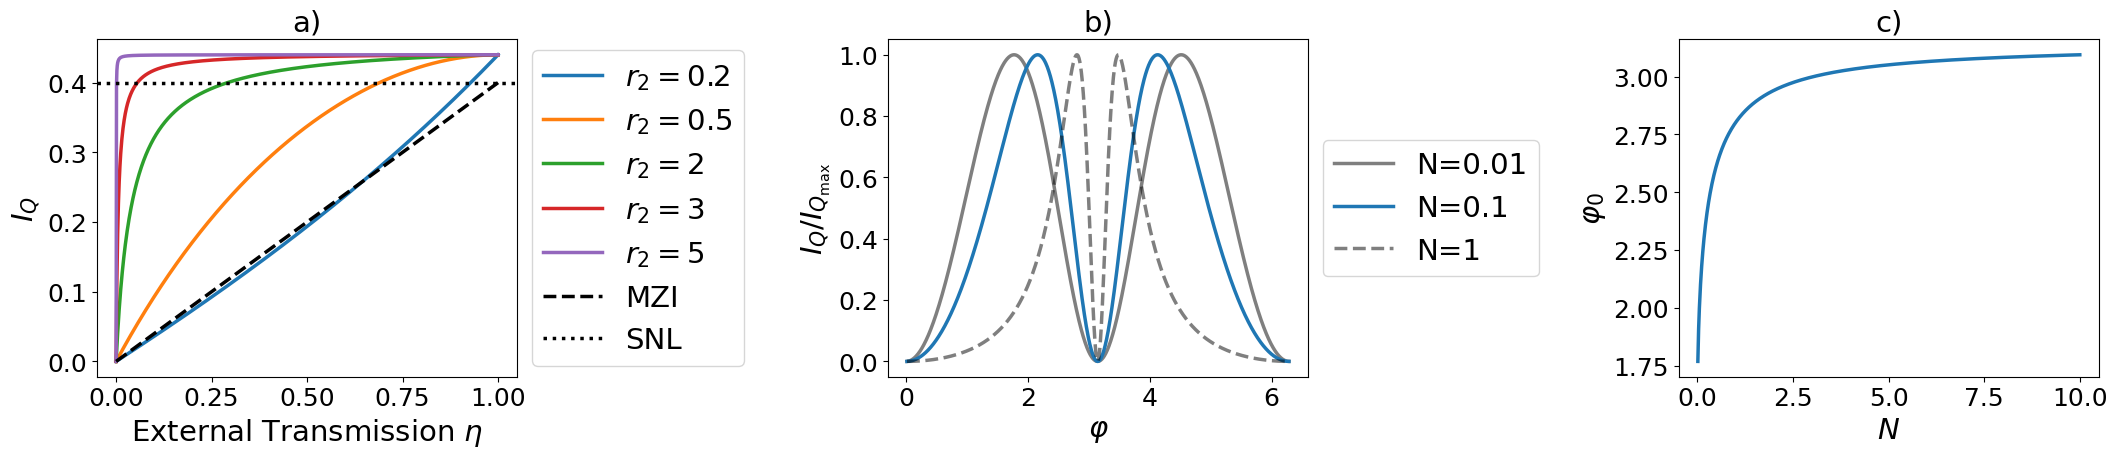

In [105]:
N=0.1
#internal loss plots

'''

plt.title(r"Optimal $I_Q$ vs. $\eta$ of unseeded Yurke Interferometer"+"\n"+"for $N=$"+str(N)+r", $T=1$",fontsize=fsize)
plt.xlabel(r"External Transmission $\eta$",fontsize=fsize)
plt.ylabel(r"$I_Q$",fontsize=fsize)
plt.plot(ndata,IQdata1,label=r"$r_2=1$",linewidth=wsize)
plt.plot(ndata,IQdata3,label=r"$r_2=3$",linewidth=wsize)
plt.plot(ndata,IQdata5,label=r"$r_2=5$",linewidth=wsize)
plt.hlines(4*N*(N+1),0,1,color="black",linestyle="dashed",label=r"$I_{Q_{max}}$")
plt.legend(fontsize=fsize)
plt.savefig(fname="IQYurkeExternal",format="eps")
plt.show()
    
plt.title(r"$I_Q$ vs. $\varphi$ of unseeded Yurke Interferometer"+"\n"+"for $r_2=5$, $T=1$",fontsize=fsize)
plt.ylabel(r"Normalized $I_Q$",fontsize=fsize)
plt.xlabel(r"$\varphi$",fontsize=fsize)
plt.plot(pdata,Idata1/np.max(Idata1),label="N=0.01",color="black",alpha=0.5,linewidth=wsize)
plt.plot(pdata,Idata2/np.max(Idata2),label="N=0.1",linewidth=wsize)
plt.plot(pdata,Idata3/np.max(Idata3),label="N=1",color="black",alpha=0.5,linestyle="dashed",linewidth=wsize)
plt.legend(fontsize=fsize)
plt.savefig(fname="IQvspYurkeExternal",format="eps")
plt.show()



Ndata=np.linspace(0,10,1000)

plt.title(r"$\varphi_0$ vs. $N$",fontsize=fsize)
plt.plot(Ndata,popt(Ndata),linewidth=wsize)
plt.ylabel(r"$\varphi_0$",fontsize=fsize)
plt.xlabel(r"$N$",fontsize=fsize)
plt.savefig(fname="p0",format="eps")
plt.show()
'''


fig, ax= plt.subplots(nrows=1, ncols=3, figsize=(22, 5.5))



#ax[0].set_title(r"Max $I_Q$ vs. T of Yurke/Mandel Interferometer"+"\n"+"for $N=$"+str(N)+", $\eta=1$",fontsize=fsize)
ax[0].set_title("a)",fontsize=fsize)
ax[0].set_xlabel(r"External Transmission $\eta$",fontsize=fsize)
ax[0].set_ylabel(r"$I_Q$",fontsize=fsize)
ax[0].plot(ndata,IQdatap2,label=r"$r_2=0.2$",linewidth=wsize)
ax[0].plot(ndata,IQdatap5,label=r"$r_2=0.5$",linewidth=wsize)
ax[0].plot(ndata,IQdata2,label=r"$r_2=2$",linewidth=wsize)
ax[0].plot(ndata,IQdata3,label=r"$r_2=3$",linewidth=wsize)
ax[0].plot(ndata,IQdata5,label=r"$r_2=5$",linewidth=wsize)
ax[0].plot(ndata,MZI(ndata),color="black",linestyle="dashed",label="MZI",linewidth=wsize)
ax[0].axhline(4*N,xmin=0,xmax=1,color="black",linestyle="dotted",label=r"SNL",linewidth=wsize)
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fsize)
ax[0].tick_params(axis='both', which='major', labelsize=18)


#ax[1].set_title(r"Optimal Parameters vs. $T$ of Yurke/Mandel"+"\n"+"Interferometer for $N=$"+str(N)+", $\eta=1$",fontsize=fsize)
ax[1].set_title("b)",fontsize=fsize)
ax[1].set_ylabel(r"$I_Q/I_{Q_{\mathrm{max}}}$",fontsize=fsize)
ax[1].set_xlabel(r"$\varphi$",fontsize=fsize)
ax[1].plot(pdata,Idata1/np.max(Idata1),label="N=0.01",color="black",alpha=0.5,linewidth=wsize)
ax[1].plot(pdata,Idata2/np.max(Idata2),label="N=0.1",linewidth=wsize)
ax[1].plot(pdata,Idata3/np.max(Idata3),label="N=1",color="black",alpha=0.5,linestyle="dashed",linewidth=wsize)
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fsize)
ax[1].tick_params(axis='both', which='major', labelsize=18)


#ax[2].set_title(r"$T_C$ vs $N$",fontsize=fsize)
ax[2].set_title("c)",fontsize=fsize)
ax[2].plot(Ndata,popt(Ndata),linewidth=wsize)
ax[2].set_ylabel(r"$\varphi_0$",fontsize=fsize)
ax[2].set_xlabel(r"$N$",fontsize=fsize)
ax[2].tick_params(axis='both', which='major', labelsize=18)

fig.tight_layout(pad=4)
plt.savefig(fname="VBFig.pdf",format="pdf")
plt.show()


In [10]:
#External Mandel with no a mode

def EMa(n,r1,r2):
    
    A=n*((np.sinh(2*r1)*np.sinh(r2))**2)/((np.cosh(r1)*np.cosh(r2))**2-1)
    B=4*n*(np.sinh(r2)**2)*(1-n+n*np.cosh(2*r1))*(N-np.sinh(r1)**2)/(1+2*n*((np.cosh(r1)*np.cosh(r2))**2-1))
    return A+B

In [107]:
#optimizing for each n
N=0.1
rmax=np.arcsinh(np.sqrt(N))
r2max=5

def EMaopt(n,num,r2max):
    r1list=np.linspace(0,rmax,num)
    r2list=np.linspace(0.01,r2max,num)
    data=[]
    
    for j in r1list:
        for k in r2list:
            data.append([EMa(n,j,k),j,k])
    
    cord=np.argmax(data,axis=0)[0]
    return data[cord]

nlista=np.linspace(0.01,1,1000)

optdata=[]

for i in nlista:
    optdata.append(EMaopt(i,100,r2max))
    
Idataa=np.transpose(optdata)[0]
rdataa=np.transpose(optdata)[1]
r2dataa=np.transpose(optdata)[2]

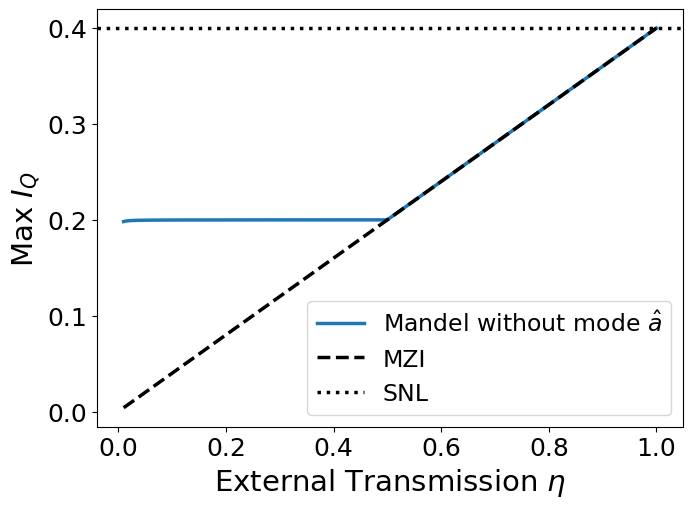

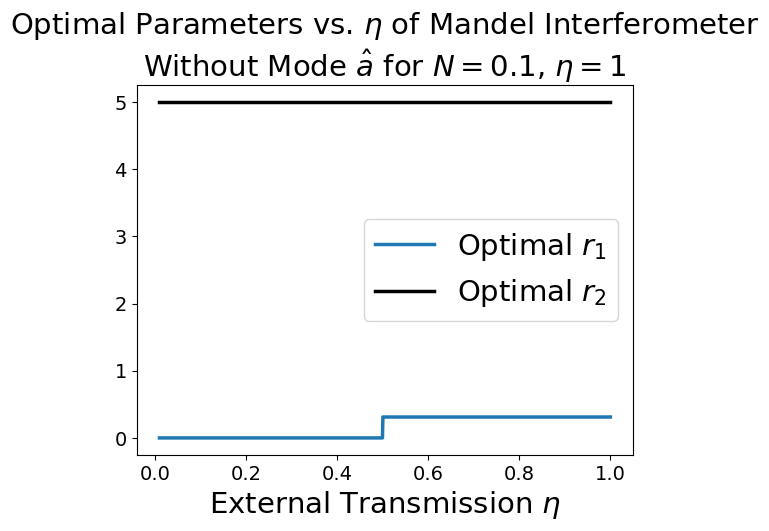

In [108]:
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

#plt.title(r"Optimal $I_Q$ vs. $\eta$ of Mandel Interferometer"+"\n"+"Without Mode $\hat{a}$ for $N=$"+str(N)+", $T=1$, $r_2=$"+str(r2max),fontsize=fsize)
ax.set_xlabel(r"External Transmission $\eta$",fontsize=fsize)
ax.set_ylabel(r"Max $I_Q$",fontsize=fsize)
ax.plot(nlista,Idataa,label=r"Mandel without mode $\hat{a}$",linewidth=wsize)
ax.plot(nlista,MZI(nlista),color="black",linestyle="dashed",label="MZI",linewidth=wsize)
ax.axhline(4*N,xmin=0,xmax=1,color="black",linestyle="dotted",label=r"SNL",linewidth=wsize)
ax.legend(fontsize=17)
ax.tick_params(axis='both', which='major', labelsize=18)

fig.tight_layout(pad=4)
plt.savefig(fname="VCFig.pdf",format="pdf")
plt.show()


plt.title(r"Optimal Parameters vs. $\eta$ of Mandel Interferometer"+"\n"+"Without Mode $\hat{a}$ for $N=$"+str(N)+", $\eta=1$",fontsize=fsize)
plt.xlabel(r"External Transmission $\eta$",fontsize=fsize)
plt.plot(nlista,rdataa,label=r"Optimal $r_1$",linewidth=wsize)
plt.plot(nlista,r2dataa,label=r"Optimal $r_2$",color="black",linewidth=wsize)
plt.legend(fontsize=fsize)
plt.show()


In [13]:
#QFI for Mandel with all modes

from numpy import cosh
from numpy import sinh
from numpy import cos
from numpy import sin
from numpy import sqrt


def MQFI(n,r1,r2):
    return 4*n*(N - sinh(r1)**2)*(n + (1 - n)*cosh(2*r2))*(n*cosh(2*r1) - n + 1)/(4*n*(1 - n)*(cosh(r1)**2*cosh(r2)**2 - 1) + 1) + n*(2*n*(1 - n)*(cosh(r1)**2*cosh(r2)**4 + 1) + (2*n - 1)*(n*(cosh(r1)**2 + 1) - 1)*cosh(r2)**2 - 1)*sinh(2*r1)**2/((cosh(r1)**2*cosh(r2)**2 - 1)*(2*n*(1 - n)*(cosh(r1)**2*cosh(r2)**2 - 1) + 1))

In [14]:
#optimizing for each n
N=0.1
rmax=np.arcsinh(np.sqrt(N))
r2max=5

def EMopt(n,num,r2max):
    r1list=np.linspace(0.01,rmax,num)
    r2list=np.linspace(0.01,r2max,num)
    data=[]
    
    for j in r1list:
        for k in r2list:
            data.append([MQFI(n,j,k),j,k])
    
    cord=np.argmax(data,axis=0)[0]
    return data[cord]

nlist=np.linspace(0.01,0.99,500)

optdata=[]

for i in nlist:
    optdata.append(EMopt(i,500,r2max))
    
Idata=np.transpose(optdata)[0]
rdata=np.transpose(optdata)[1]
r2data=np.transpose(optdata)[2]

IdataYM=[]
for j in range(len(r2data)):
    IdataYM.append(EYmax(nlist[j],r2data[j]))

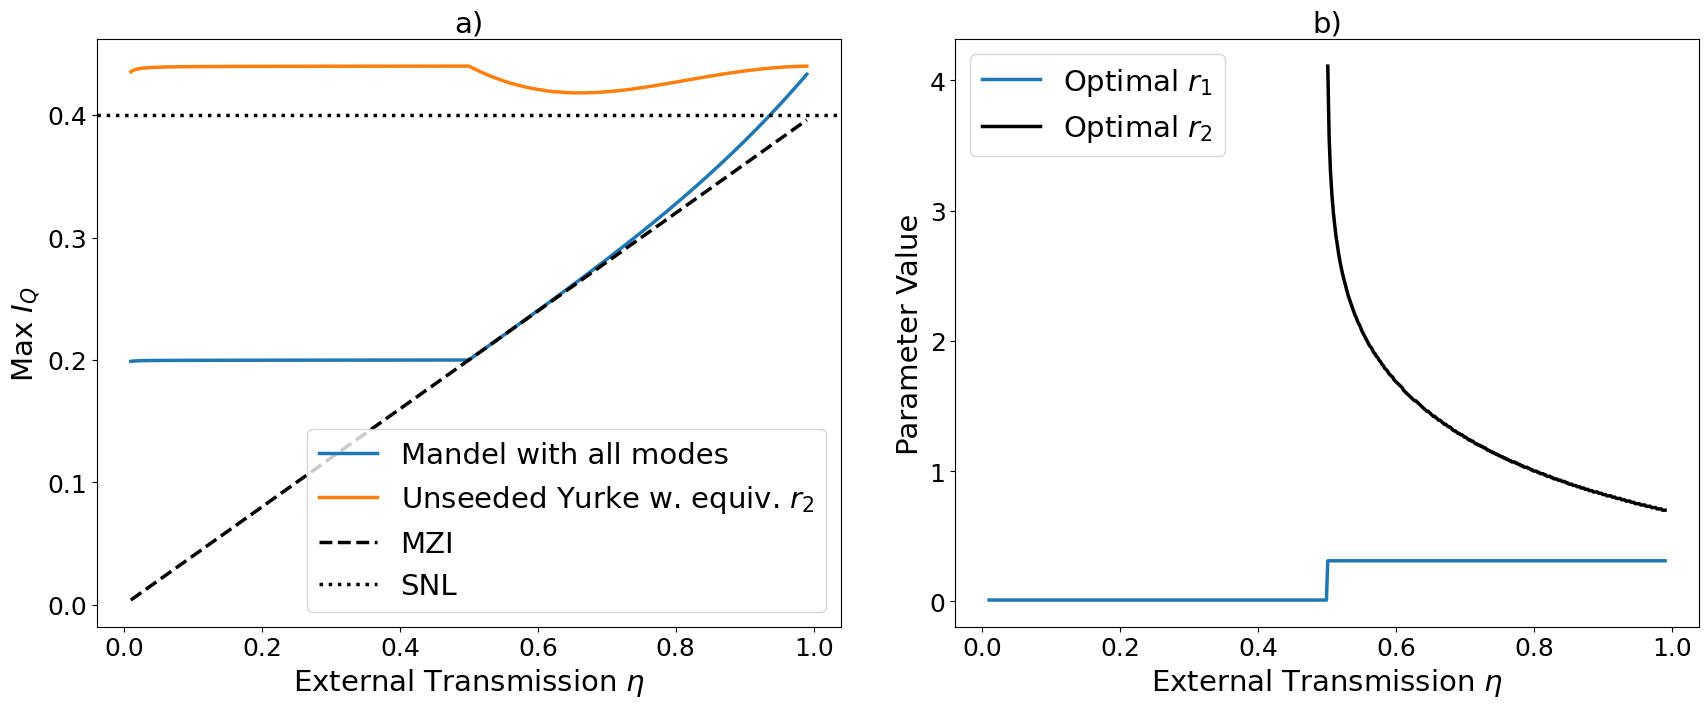

In [167]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

half=len(nlist)//2

N=0.1

#plt.title(r"Optimal $I_Q$ vs. $\eta$ of Mandel Interferometer"+"\n"+"With All Modes for $N=$"+str(N)+", $T=1$, $r_{2_{max}}=$"+str(r2max),fontsize=fsize)
ax[0].set_title("a)", fontsize=fsize)
ax[0].set_xlabel(r"External Transmission $\eta$",fontsize=fsize)
ax[0].set_ylabel(r"Max $I_Q$",fontsize=fsize)
ax[0].plot(nlist,Idata,label=r"Mandel with all modes",linewidth=wsize)
ax[0].plot(nlist,IdataYM,label=r"Unseeded Yurke w. equiv. $r_2$",linewidth=wsize)
ax[0].plot(nlist,MZI(nlist),color="black",linestyle="dashed",label="MZI",linewidth=wsize)
ax[0].axhline(4*N,xmin=0,xmax=1,color="black",linestyle="dotted",label=r"SNL",linewidth=wsize)
ax[0].legend(fontsize=fsize)
ax[0].tick_params(axis='both', which='major', labelsize=18)

#plt.title(r"Optimal Parameters vs. $\eta$ of Mandel Interferometer"+"\n"+"With All Modes for $N=$"+str(N)+", $T=1, r_{2_{max}}=$"+str(r2max),fontsize=fsize)
ax[1].set_title("b)", fontsize=fsize)
ax[1].set_xlabel(r"External Transmission $\eta$",fontsize=fsize)
ax[1].set_ylabel("Parameter Value", fontsize=fsize)
ax[1].plot(nlist,rdata,label=r"Optimal $r_1$",linewidth=wsize)
ax[1].plot(nlist[half:],r2data[half:],label=r"Optimal $r_2$",color="black",linewidth=wsize)
ax[1].legend(loc="upper left", fontsize=fsize)
ax[1].tick_params(axis='both', which='major', labelsize=18)

fig.tight_layout(pad=4)
plt.savefig(fname="VDFig.pdf",format="pdf")
plt.show()

In [83]:
#Internal data for other N values


#QFI for internal loss
def IY(T,r):
    return (((T*np.sinh(2*r))**2)/(1-T+T**2+T*(1-T)*np.cosh(2*r))+4*T*(1-T+T*np.cosh(2*r))*(N-np.sinh(r)**2)/(1-2*T+2*(T**2)+2*T*(1-T)*np.cosh(2*r)))

N=1
rmax=np.arcsinh(np.sqrt(N))
rlist=np.linspace(0.01,rmax,1000)

#data will be of the form [T,IQmax,r1opt]
data=[]

for i in Tvals:
    Ilist=[]
    for j in rlist:
        Ilist.append(IY(i,j))
        
    graph=[rlist,Ilist]
    IQmax=np.amax(graph,axis=1)[1]
    optcoord=np.argmax(graph,axis=1)[1]
    r1opt=rlist[optcoord]
    data.append([i,IQmax,r1opt])
    
TdataY1=np.transpose(data)[0]
IdataY1=np.transpose(data)[1]
rdataY1=np.transpose(data)[2]


N=10
rmax=np.arcsinh(np.sqrt(N))
rlist=np.linspace(0.01,rmax,1000)

#data will be of the form [T,IQmax,r1opt]
data=[]

for i in Tvals:
    Ilist=[]
    for j in rlist:
        Ilist.append(IY(i,j))
        
    graph=[rlist,Ilist]
    IQmax=np.amax(graph,axis=1)[1]
    optcoord=np.argmax(graph,axis=1)[1]
    r1opt=rlist[optcoord]
    data.append([i,IQmax,r1opt])
    
TdataY10=np.transpose(data)[0]
IdataY10=np.transpose(data)[1]
rdataY10=np.transpose(data)[2]

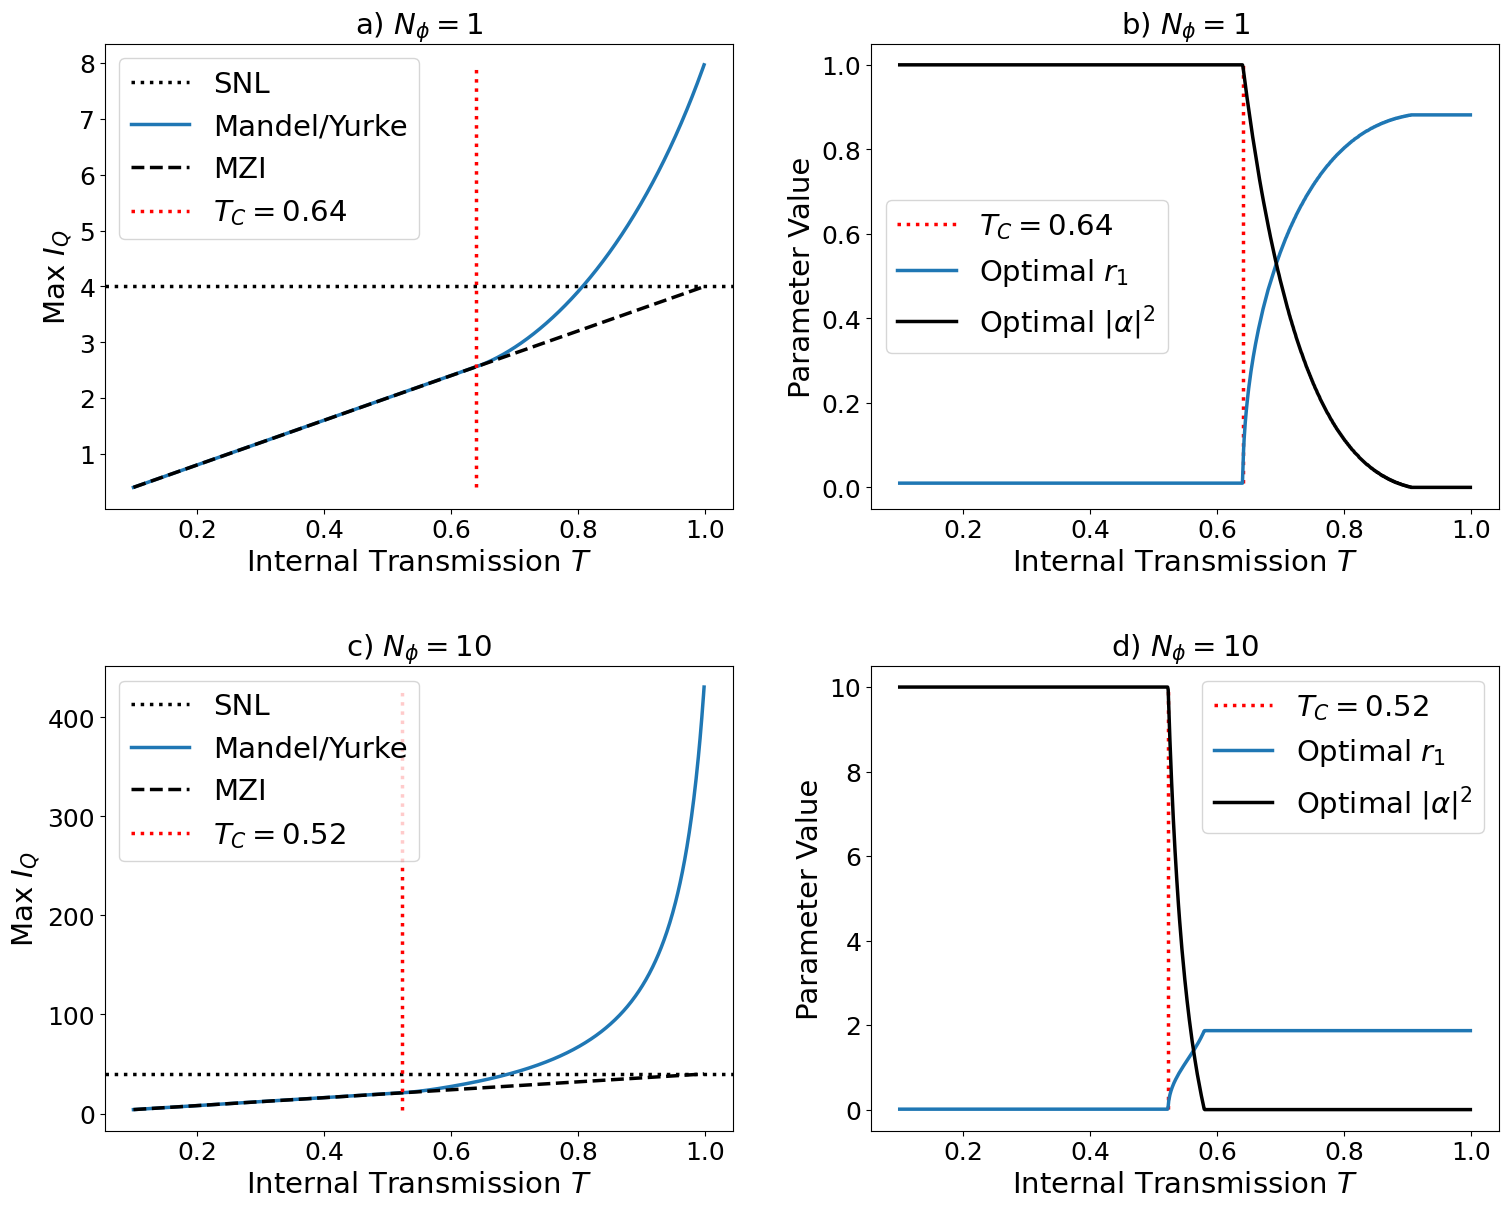

In [88]:
#internal loss plots for other N values


fig, ax= plt.subplots(nrows=2, ncols=2, figsize=(16, 13))


N=1
#ax[0].set_title(r"Max $I_Q$ vs. T of Yurke/Mandel Interferometer"+"\n"+"for $N=$"+str(N)+", $\eta=1$",fontsize=fsize)
ax[0,0].set_title(r"a) $N_\phi=1$",fontsize=fsize)
ax[0,0].set_xlabel(r"Internal Transmission $T$",fontsize=fsize)
ax[0,0].set_ylabel(r"Max $I_Q$",fontsize=fsize)
ax[0,0].axhline(4*N,xmin=0,xmax=1,color="black",linestyle="dotted",label=r"SNL",linewidth=wsize)
ax[0,0].plot(TdataY1,IdataY1,label="Mandel/Yurke",linewidth=wsize)
ax[0,0].plot(TdataY1,MZI(TdataY1),color="black",linestyle="dashed",label="MZI",linewidth=wsize)
ax[0,0].vlines(x=TC(N),ymin=np.min(IdataY1),ymax=np.max(IdataY1),color="red",label="$T_C=$"+str(round(TC(N),2)),linestyle="dotted",linewidth=wsize)
ax[0,0].legend(fontsize=fsize)
ax[0,0].tick_params(axis='both', which='major', labelsize=18)


#ax[1].set_title(r"Optimal Parameters vs. $T$ of Yurke/Mandel"+"\n"+"Interferometer for $N=$"+str(N)+", $\eta=1$",fontsize=fsize)
ax[0,1].set_title(r"b) $N_\phi=1$",fontsize=fsize)
ax[0,1].set_xlabel(r"Internal Transmission $T$",fontsize=fsize)
ax[0,1].set_ylabel("Parameter Value", fontsize=fsize)
ax[0,1].vlines(x=TC(N),ymin=np.min(rdataY1),ymax=np.max(optseed(rdataY1)),color="red",label="$T_C=$"+str(round(TC(N),2)),linestyle="dotted",linewidth=wsize)
ax[0,1].plot(TdataY1,rdataY1,label=r"Optimal $r_1$",linewidth=wsize)
ax[0,1].plot(TdataY1,optseed(rdataY1),label=r"Optimal $|\alpha|^2$",color="black",linewidth=wsize)
ax[0,1].legend(fontsize=fsize)
ax[0,1].tick_params(axis='both', which='major', labelsize=18)


N=10

#ax[0].set_title(r"Max $I_Q$ vs. T of Yurke/Mandel Interferometer"+"\n"+"for $N=$"+str(N)+", $\eta=1$",fontsize=fsize)
ax[1,0].set_title(r"c) $N_\phi=10$",fontsize=fsize)
ax[1,0].set_xlabel(r"Internal Transmission $T$",fontsize=fsize)
ax[1,0].set_ylabel(r"Max $I_Q$",fontsize=fsize)
ax[1,0].axhline(4*N,xmin=0,xmax=1,color="black",linestyle="dotted",label=r"SNL",linewidth=wsize)
ax[1,0].plot(TdataY10,IdataY10,label="Mandel/Yurke",linewidth=wsize)
ax[1,0].plot(TdataY10,MZI(TdataY10),color="black",linestyle="dashed",label="MZI",linewidth=wsize)
ax[1,0].vlines(x=TC(N),ymin=np.min(IdataY10),ymax=np.max(IdataY10),color="red",label="$T_C=$"+str(round(TC(N),2)),linestyle="dotted",linewidth=wsize)
ax[1,0].legend(fontsize=fsize)
ax[1,0].tick_params(axis='both', which='major', labelsize=18)


#ax[1].set_title(r"Optimal Parameters vs. $T$ of Yurke/Mandel"+"\n"+"Interferometer for $N=$"+str(N)+", $\eta=1$",fontsize=fsize)
ax[1,1].set_title(r"d) $N_\phi=10$",fontsize=fsize)
ax[1,1].set_xlabel(r"Internal Transmission $T$",fontsize=fsize)
ax[1,1].set_ylabel("Parameter Value", fontsize=fsize)
ax[1,1].vlines(x=TC(N),ymin=np.min(rdataY10),ymax=np.max(optseed(rdataY10)),color="red",label="$T_C=$"+str(round(TC(N),2)),linestyle="dotted",linewidth=wsize)
ax[1,1].plot(TdataY10,rdataY10,label=r"Optimal $r_1$",linewidth=wsize)
ax[1,1].plot(TdataY10,optseed(rdataY10),label=r"Optimal $|\alpha|^2$",color="black",linewidth=wsize)
ax[1,1].legend(fontsize=fsize)
ax[1,1].tick_params(axis='both', which='major', labelsize=18)


fig.tight_layout(pad=4)
plt.savefig(fname="AS1Fig.pdf",format="pdf")
plt.show()



In [92]:
#Yurke External data for other N values

N=1
rmax=np.arcsinh(np.sqrt(N))

#returns optimal angle in case of high r2
def popt(N):
    num=-2*(2*N+1)*np.sqrt(N*(N+1))
    den=4*N*(N+1)+1
    return np.arccos(num/den)
    

#finds maximum QFI of unseeded Yurke with external loss
def EYmax(n,r2):
    rmax=np.arcsinh(np.sqrt(N))
    pvals=np.linspace(0,np.pi,1000)
    Ivals=[]
    for i in pvals:
        Ivals.append(EY(n,rmax,r2,i))
    return np.max(Ivals)

ndata=np.linspace(0,1,1000)

IQdatap21=[]
for j in ndata:
    IQdatap21.append(EYmax(j,0.2))
IQdatap51=[]
for j in ndata:
    IQdatap51.append(EYmax(j,0.5))
IQdata21=[]
for j in ndata:
    IQdata21.append(EYmax(j,2))
IQdata31=[]
for j in ndata:
    IQdata31.append(EYmax(j,3))
IQdata51=[]
for j in ndata:
    IQdata51.append(EYmax(j,5))
    
    

N=10
rmax=np.arcsinh(np.sqrt(N))

#returns optimal angle in case of high r2
def popt(N):
    num=-2*(2*N+1)*np.sqrt(N*(N+1))
    den=4*N*(N+1)+1
    return np.arccos(num/den)
    

#finds maximum QFI of unseeded Yurke with external loss
def EYmax(n,r2):
    rmax=np.arcsinh(np.sqrt(N))
    pvals=np.linspace(0,np.pi,1000)
    Ivals=[]
    for i in pvals:
        Ivals.append(EY(n,rmax,r2,i))
    return np.max(Ivals)

ndata=np.linspace(0,1,1000)

IQdatap210=[]
for j in ndata:
    IQdatap210.append(EYmax(j,0.2))
IQdatap510=[]
for j in ndata:
    IQdatap510.append(EYmax(j,0.5))
IQdata210=[]
for j in ndata:
    IQdata210.append(EYmax(j,2))
IQdata310=[]
for j in ndata:
    IQdata310.append(EYmax(j,3))
IQdata510=[]
for j in ndata:
    IQdata510.append(EYmax(j,5))

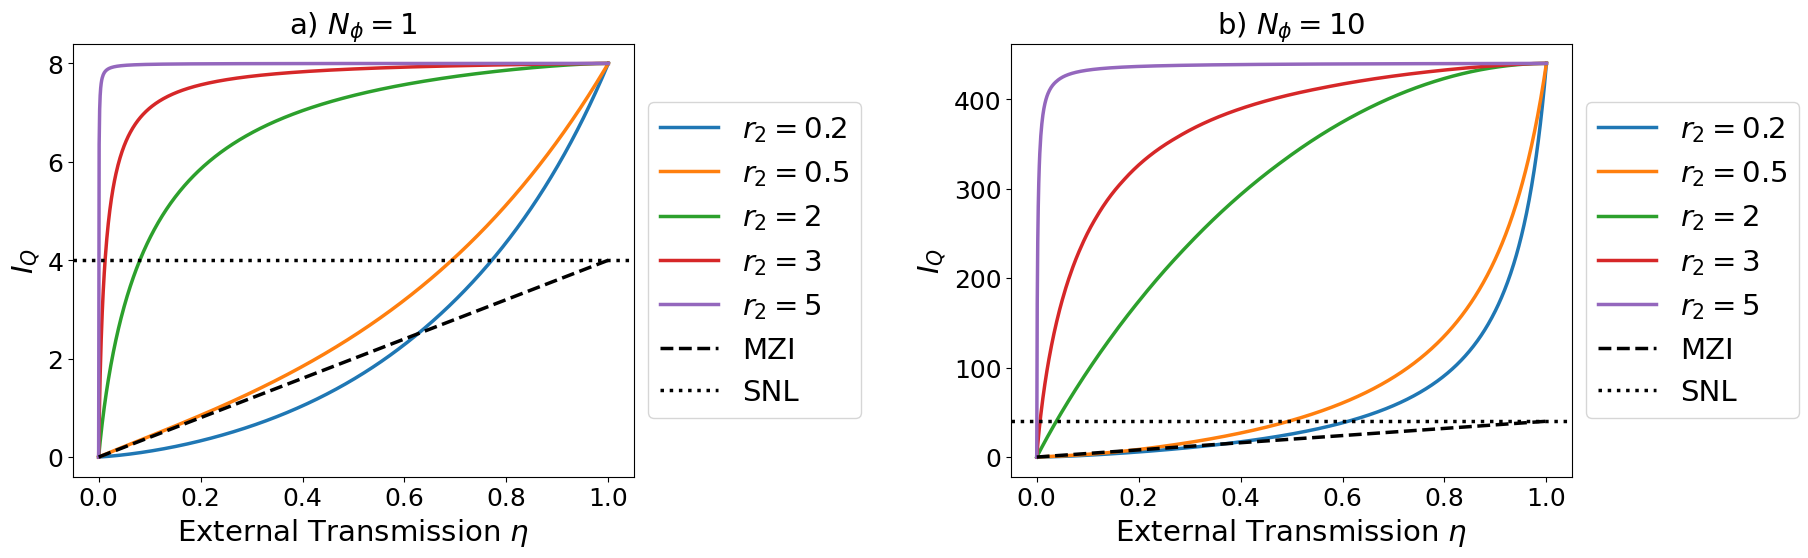

In [119]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(19, 6.5))

N=1

#ax[0].set_title(r"Max $I_Q$ vs. T of Yurke/Mandel Interferometer"+"\n"+"for $N=$"+str(N)+", $\eta=1$",fontsize=fsize)
ax[0].set_title(r"a) $N_\phi=1$",fontsize=fsize)
ax[0].set_xlabel(r"External Transmission $\eta$",fontsize=fsize)
ax[0].set_ylabel(r"$I_Q$",fontsize=fsize)
ax[0].plot(ndata,IQdatap21,label=r"$r_2=0.2$",linewidth=wsize)
ax[0].plot(ndata,IQdatap51,label=r"$r_2=0.5$",linewidth=wsize)
ax[0].plot(ndata,IQdata21,label=r"$r_2=2$",linewidth=wsize)
ax[0].plot(ndata,IQdata31,label=r"$r_2=3$",linewidth=wsize)
ax[0].plot(ndata,IQdata51,label=r"$r_2=5$",linewidth=wsize)
ax[0].plot(ndata,MZI(ndata),color="black",linestyle="dashed",label="MZI",linewidth=wsize)
ax[0].axhline(4*N,xmin=0,xmax=1,color="black",linestyle="dotted",label=r"SNL",linewidth=wsize)
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fsize)
ax[0].tick_params(axis='both', which='major', labelsize=18)


N=10

#ax[0].set_title(r"Max $I_Q$ vs. T of Yurke/Mandel Interferometer"+"\n"+"for $N=$"+str(N)+", $\eta=1$",fontsize=fsize)
ax[1].set_title(r"b) $N_\phi=10$",fontsize=fsize)
ax[1].set_xlabel(r"External Transmission $\eta$",fontsize=fsize)
ax[1].set_ylabel(r"$I_Q$",fontsize=fsize)
ax[1].plot(ndata,IQdatap210,label=r"$r_2=0.2$",linewidth=wsize)
ax[1].plot(ndata,IQdatap510,label=r"$r_2=0.5$",linewidth=wsize)
ax[1].plot(ndata,IQdata210,label=r"$r_2=2$",linewidth=wsize)
ax[1].plot(ndata,IQdata310,label=r"$r_2=3$",linewidth=wsize)
ax[1].plot(ndata,IQdata510,label=r"$r_2=5$",linewidth=wsize)
ax[1].plot(ndata,MZI(ndata),color="black",linestyle="dashed",label="MZI",linewidth=wsize)
ax[1].axhline(4*N,xmin=0,xmax=1,color="black",linestyle="dotted",label=r"SNL",linewidth=wsize)
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fsize)
ax[1].tick_params(axis='both', which='major', labelsize=18)


fig.tight_layout(pad=4)
plt.savefig(fname="AS2Fig.pdf",format="pdf")
plt.show()

In [109]:
#data for external mandel no a mode for different N values

N=1
rmax=np.arcsinh(np.sqrt(N))
r2max=5

def EMaopt(n,num,r2max):
    r1list=np.linspace(0,rmax,num)
    r2list=np.linspace(0.01,r2max,num)
    data=[]
    
    for j in r1list:
        for k in r2list:
            data.append([EMa(n,j,k),j,k])
    
    cord=np.argmax(data,axis=0)[0]
    return data[cord]

nlista=np.linspace(0.01,1,1000)

optdata=[]

for i in nlista:
    optdata.append(EMaopt(i,100,r2max))
    
Idataa1=np.transpose(optdata)[0]
rdataa1=np.transpose(optdata)[1]
r2dataa1=np.transpose(optdata)[2]



N=10
rmax=np.arcsinh(np.sqrt(N))
r2max=5

def EMaopt(n,num,r2max):
    r1list=np.linspace(0,rmax,num)
    r2list=np.linspace(0.01,r2max,num)
    data=[]
    
    for j in r1list:
        for k in r2list:
            data.append([EMa(n,j,k),j,k])
    
    cord=np.argmax(data,axis=0)[0]
    return data[cord]

nlista=np.linspace(0.01,1,1000)

optdata=[]

for i in nlista:
    optdata.append(EMaopt(i,100,r2max))
    
Idataa10=np.transpose(optdata)[0]
rdataa10=np.transpose(optdata)[1]
r2dataa10=np.transpose(optdata)[2]

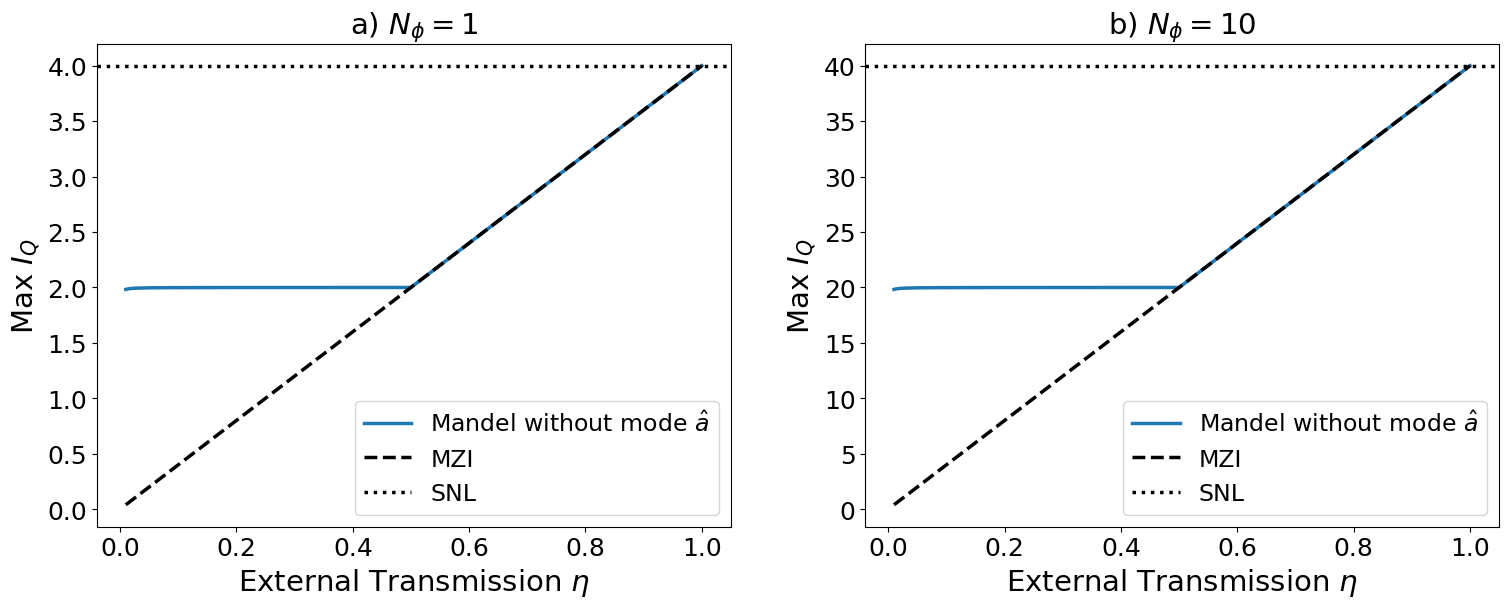

In [118]:
#plots for external mandel no a mode for different N values

fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

N=1

#plt.title(r"Optimal $I_Q$ vs. $\eta$ of Mandel Interferometer"+"\n"+"Without Mode $\hat{a}$ for $N=$"+str(N)+", $T=1$, $r_2=$"+str(r2max),fontsize=fsize)
ax[0].set_title(r"a) $N_\phi=1$",fontsize=fsize)
ax[0].set_xlabel(r"External Transmission $\eta$",fontsize=fsize)
ax[0].set_ylabel(r"Max $I_Q$",fontsize=fsize)
ax[0].plot(nlista,Idataa1,label=r"Mandel without mode $\hat{a}$",linewidth=wsize)
ax[0].plot(nlista,MZI(nlista),color="black",linestyle="dashed",label="MZI",linewidth=wsize)
ax[0].axhline(4*N,xmin=0,xmax=1,color="black",linestyle="dotted",label=r"SNL",linewidth=wsize)
ax[0].legend(fontsize=17)
ax[0].tick_params(axis='both', which='major', labelsize=18)


N=10

#plt.title(r"Optimal $I_Q$ vs. $\eta$ of Mandel Interferometer"+"\n"+"Without Mode $\hat{a}$ for $N=$"+str(N)+", $T=1$, $r_2=$"+str(r2max),fontsize=fsize)
ax[1].set_title(r"b) $N_\phi=10$",fontsize=fsize)
ax[1].set_xlabel(r"External Transmission $\eta$",fontsize=fsize)
ax[1].set_ylabel(r"Max $I_Q$",fontsize=fsize)
ax[1].plot(nlista,Idataa10,label=r"Mandel without mode $\hat{a}$",linewidth=wsize)
ax[1].plot(nlista,MZI(nlista),color="black",linestyle="dashed",label="MZI",linewidth=wsize)
ax[1].axhline(4*N,xmin=0,xmax=1,color="black",linestyle="dotted",label=r"SNL",linewidth=wsize)
ax[1].legend(fontsize=17)
ax[1].tick_params(axis='both', which='major', labelsize=18)

fig.tight_layout(pad=4)
plt.savefig(fname="AS3Fig.pdf",format="pdf")
plt.show()

In [156]:
#data for external madel all modes with different N

def EMopt(n,num,r2max):
    r1list=np.linspace(0.01,rmax,num)
    r2list=np.linspace(0,r2max,num)
    
    data=[]
    
    for j in r1list:
        for k in r2list:
            data.append([MQFI(n,j,k),j,k])
    
    cord=np.argmax(data,axis=0)[0]
    return data[cord]

N=1
rmax=np.arcsinh(np.sqrt(N))
r2max=5


nlist=np.linspace(0.01,0.99,500)

optdata=[]

for i in nlist:
    optdata.append(EMopt(i,500,r2max))
    
Idata1=np.transpose(optdata)[0]
rdata1=np.transpose(optdata)[1]
r2data1=np.transpose(optdata)[2]

IdataYM1=[]
for j in range(len(r2data)):
    IdataYM1.append(EYmax(nlist[j],r2data[j]))
    


N=10
rmax=np.arcsinh(np.sqrt(N))
r2max=5


nlist=np.linspace(0.01,0.99,500)

optdata=[]

for i in nlist:
    optdata.append(EMopt(i,500,r2max))
    
Idata10=np.transpose(optdata)[0]
rdata10=np.transpose(optdata)[1]
r2data10=np.transpose(optdata)[2]

IdataYM10=[]
for j in range(len(r2data)):
    IdataYM10.append(EYmax(nlist[j],r2data[j]))

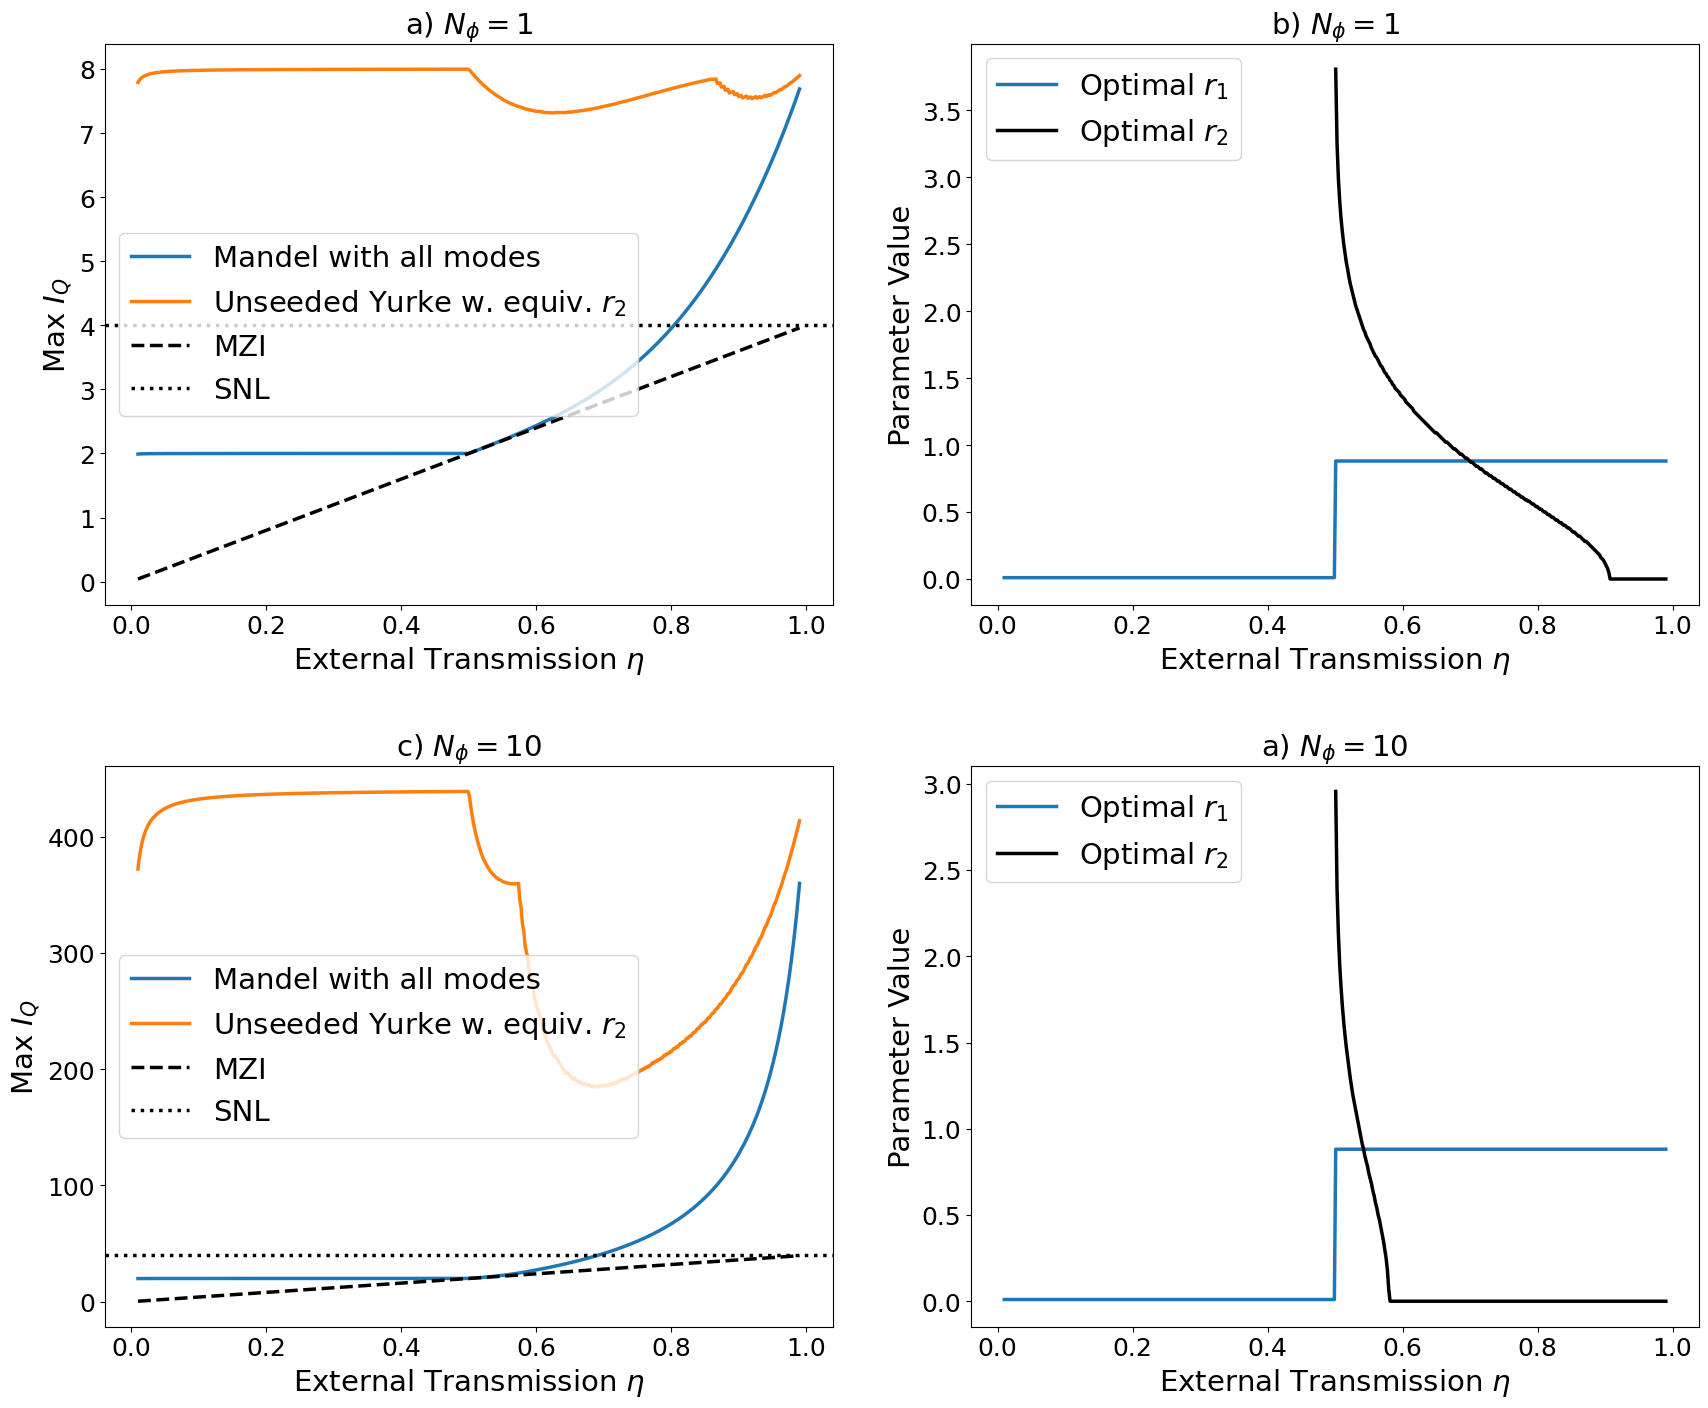

In [166]:
fig, ax= plt.subplots(nrows=2, ncols=2, figsize=(18, 15))

half=len(nlist)//2

def EMr20(n):
    return 4*n**2*N*(N+1)/(1+2*N*n*(1-n))


N=1

#plt.title(r"Optimal $I_Q$ vs. $\eta$ of Mandel Interferometer"+"\n"+"With All Modes for $N=$"+str(N)+", $T=1$, $r_{2_{max}}=$"+str(r2max),fontsize=fsize)
ax[0,0].set_title(r"a) $N_\phi=1$", fontsize=fsize)
ax[0,0].set_xlabel(r"External Transmission $\eta$",fontsize=fsize)
ax[0,0].set_ylabel(r"Max $I_Q$",fontsize=fsize)
ax[0,0].plot(nlist,Idata1,label=r"Mandel with all modes",linewidth=wsize)
ax[0,0].plot(nlist,IdataYM1,label=r"Unseeded Yurke w. equiv. $r_2$",linewidth=wsize)
ax[0,0].plot(nlist,MZI(nlist),color="black",linestyle="dashed",label="MZI",linewidth=wsize)
#plotting r2=0 solution to check math
#ax[0,0].plot(nlist, EMr20(nlist), label=r"$r_2=0$ solution")
ax[0,0].axhline(4*N,xmin=0,xmax=1,color="black",linestyle="dotted",label=r"SNL",linewidth=wsize)
ax[0,0].legend(fontsize=fsize)
ax[0,0].tick_params(axis='both', which='major', labelsize=18)

#plt.title(r"Optimal Parameters vs. $\eta$ of Mandel Interferometer"+"\n"+"With All Modes for $N=$"+str(N)+", $T=1, r_{2_{max}}=$"+str(r2max),fontsize=fsize)
ax[0,1].set_title(r"b) $N_\phi=1$", fontsize=fsize)
ax[0,1].set_xlabel(r"External Transmission $\eta$",fontsize=fsize)
ax[0,1].set_ylabel("Parameter Value", fontsize=fsize)
ax[0,1].plot(nlist,rdata1,label=r"Optimal $r_1$",linewidth=wsize)
ax[0,1].plot(nlist[half:],r2data1[half:],label=r"Optimal $r_2$",color="black",linewidth=wsize)
ax[0,1].legend(loc="upper left", fontsize=fsize)
ax[0,1].tick_params(axis='both', which='major', labelsize=18)


N=10

#plt.title(r"Optimal $I_Q$ vs. $\eta$ of Mandel Interferometer"+"\n"+"With All Modes for $N=$"+str(N)+", $T=1$, $r_{2_{max}}=$"+str(r2max),fontsize=fsize)
ax[1,0].set_title(r"c) $N_\phi=10$", fontsize=fsize)
ax[1,0].set_xlabel(r"External Transmission $\eta$",fontsize=fsize)
ax[1,0].set_ylabel(r"Max $I_Q$",fontsize=fsize)
ax[1,0].plot(nlist,Idata10,label=r"Mandel with all modes",linewidth=wsize)
ax[1,0].plot(nlist,IdataYM10,label=r"Unseeded Yurke w. equiv. $r_2$",linewidth=wsize)
#plotting r2=0 solution to check math
#ax[1,0].plot(nlist, EMr20(nlist), label=r"$r_2=0$ solution")
ax[1,0].plot(nlist,MZI(nlist),color="black",linestyle="dashed",label="MZI",linewidth=wsize)
ax[1,0].axhline(4*N,xmin=0,xmax=1,color="black",linestyle="dotted",label=r"SNL",linewidth=wsize)
ax[1,0].legend(fontsize=fsize)
ax[1,0].tick_params(axis='both', which='major', labelsize=18)

#plt.title(r"Optimal Parameters vs. $\eta$ of Mandel Interferometer"+"\n"+"With All Modes for $N=$"+str(N)+", $T=1, r_{2_{max}}=$"+str(r2max),fontsize=fsize)
ax[1,1].set_title(r"a) $N_\phi=10$", fontsize=fsize)
ax[1,1].set_xlabel(r"External Transmission $\eta$",fontsize=fsize)
ax[1,1].set_ylabel("Parameter Value", fontsize=fsize)
ax[1,1].plot(nlist,rdata1,label=r"Optimal $r_1$",linewidth=wsize)
ax[1,1].plot(nlist[half:],r2data10[half:],label=r"Optimal $r_2$",color="black",linewidth=wsize)
ax[1,1].legend(loc="upper left", fontsize=fsize)
ax[1,1].tick_params(axis='both', which='major', labelsize=18)

fig.tight_layout(pad=4)
plt.savefig(fname="AS4Fig.pdf",format="pdf")
plt.show()